In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from scipy.stats import ttest_1samp

In [2]:
### Importing DataFrame File ##
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

In [3]:
### Checking TOP 5 Rows ######
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
### Herem, We're dropping Serial Number Column. Because, we don't get any significant information through this column, So, we're good to clear this column ""
df.drop('Serial No.',axis=1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
### Here, we're trying to display top 2 Rows to understand the DataFrame in a better Way """"
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [6]:
### Dispaling the columns Values for the DataFrame ####

df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
#### We're trying to display the DataFrame information #####
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [8]:
### Here, we're trying to display the Describe command to get significant information from the table.#####
print(df.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

In [9]:
### Dropping the rows which has null value in the Rows ####
df = df.drop('Serial No.', axis=1)

In [10]:
#### Print Process ####

print(df.describe())

        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.63000  
50%      8.5600

In [11]:
#### Null Column checking on it ####

print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [12]:
### Duplicate column, we're checking on it ####
print(df.duplicated().sum())

0


In [13]:
### Trying to get the nuique values in the column ####
for column in df.columns:
    print(column, df.columns.nunique())

GRE Score 8
TOEFL Score 8
University Rating 8
SOP 8
LOR  8
CGPA 8
Research 8
Chance of Admit  8


In [14]:
#### We're trying to do the Corrlation Acvtivity ####
print(df.corr())

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.524679  0.825878  0.563398          0.810351  
TOEFL Score        0.541563  0.810574  0.467012          0.792228  
University Rating  0.608651  0.705254  0.427047          0.690132  
SOP                0.663707  0.712154  0.408116          0.68

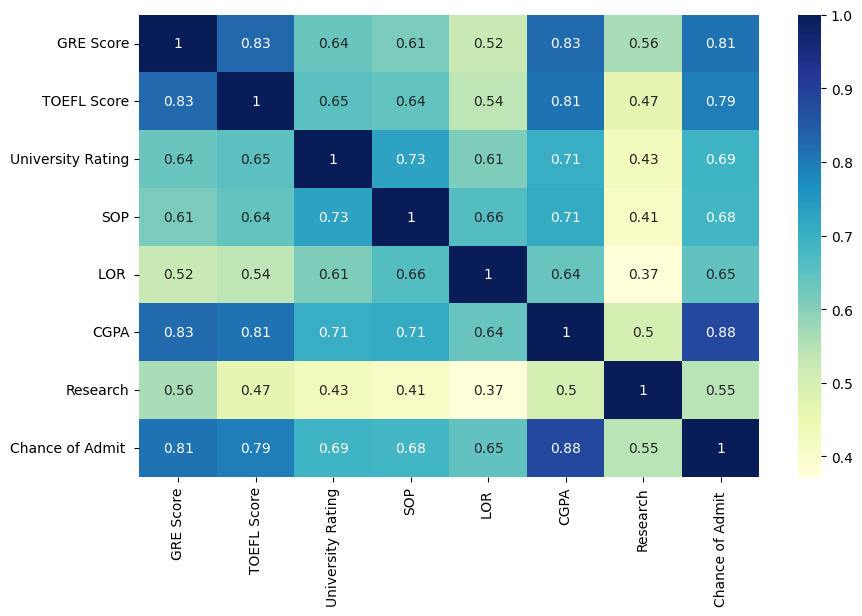

In [15]:
#### Correlation Matrix #####
corr_matrix= df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)
plt.show()

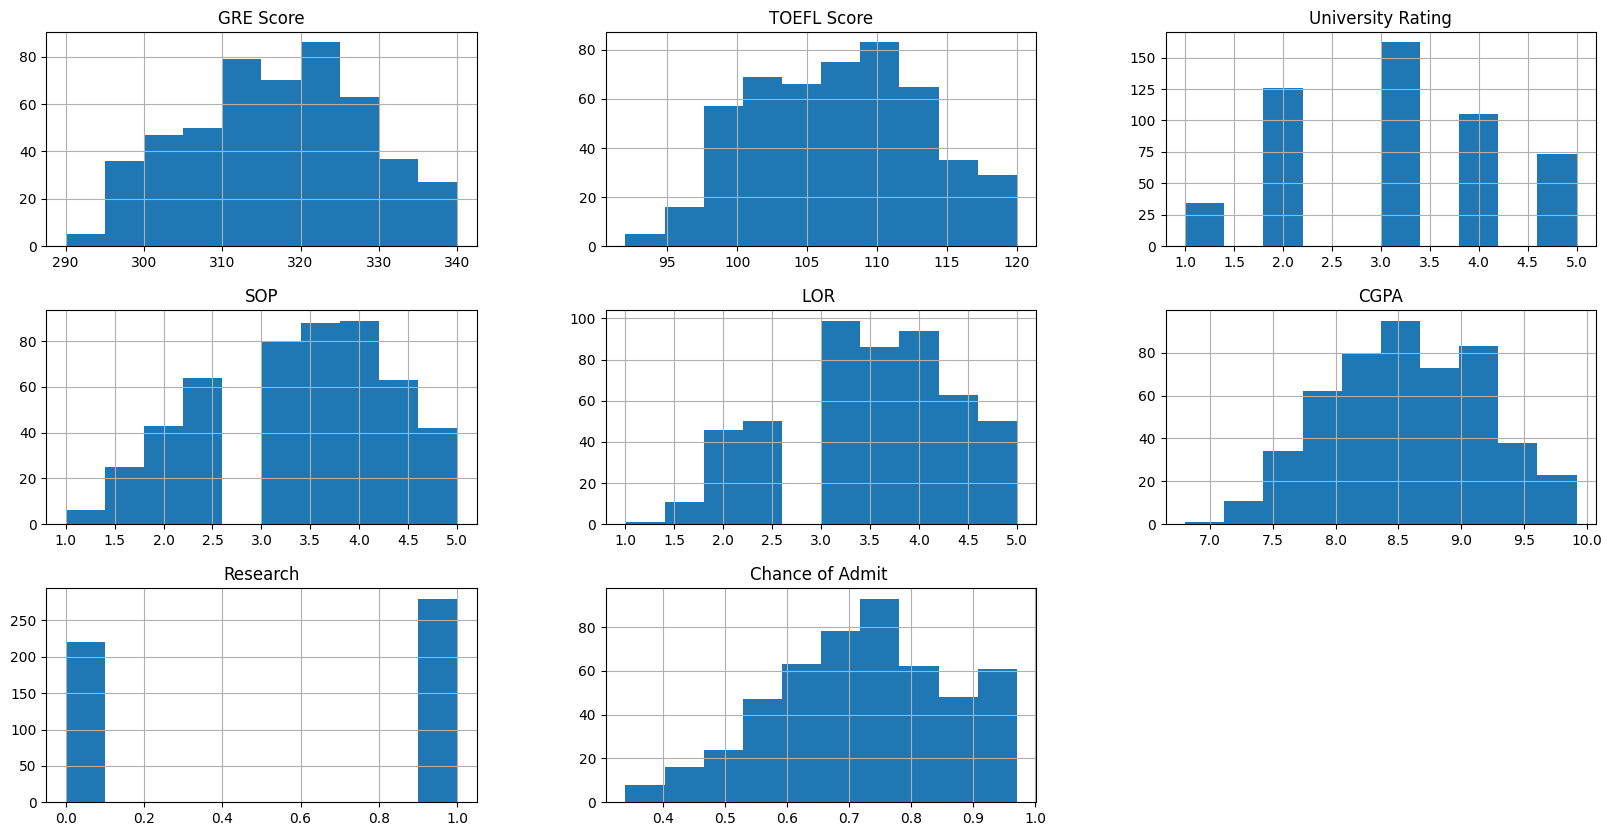

In [16]:
#### Import Matplotlib.plyplot as plt ####
import matplotlib.pyplot as plt
df.hist(figsize=(20, 10))
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from scipy.stats import ttest_1samp

C:\Users\Manikandan\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


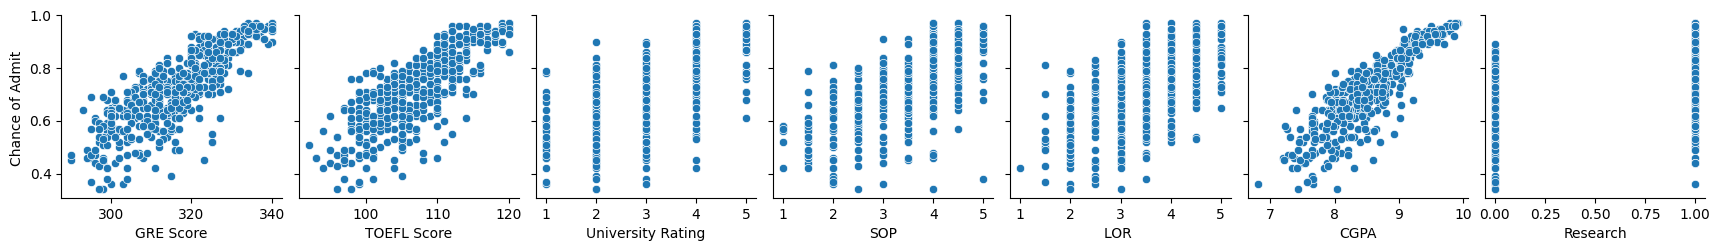

In [18]:
### Paitplot Diagram between target Variabels and Features Variables #####
sns.pairplot(df, x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research',],y_vars=['Chance of Admit '],kind='scatter')

In [19]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [20]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [21]:
continous_variables = ['TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '] 
categorical_variables = ['Chance of Admit ']

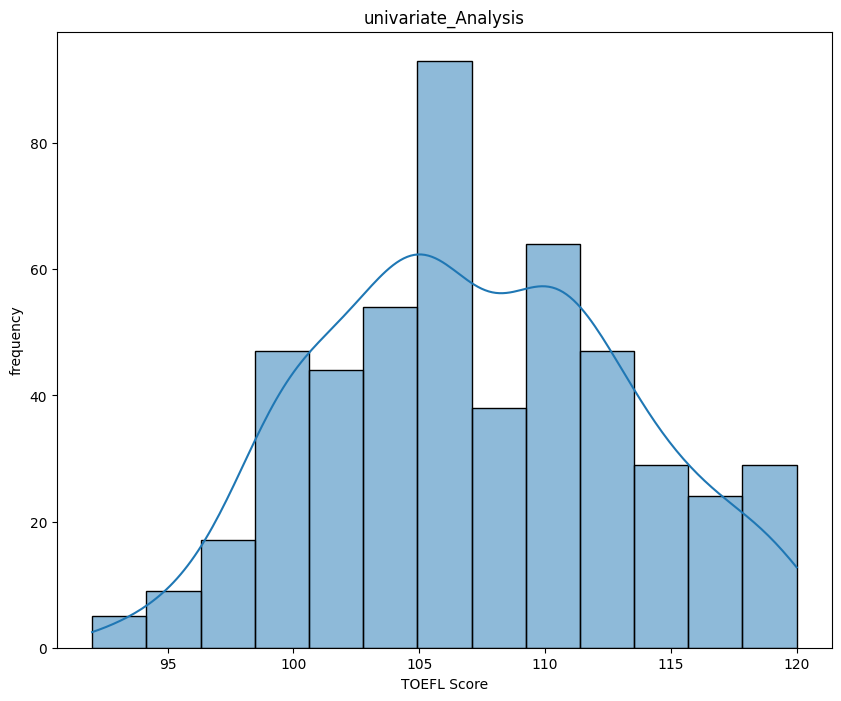

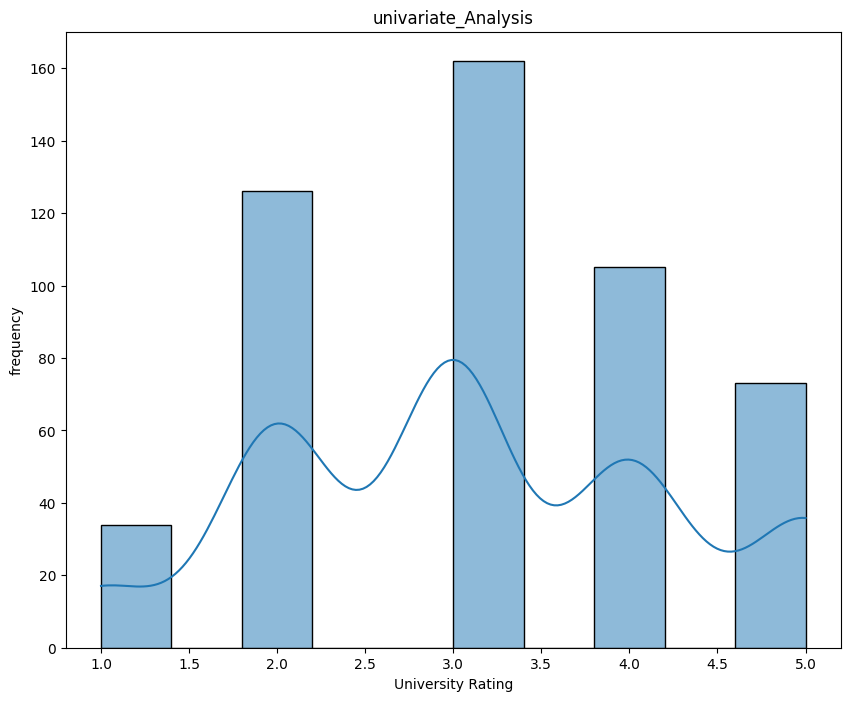

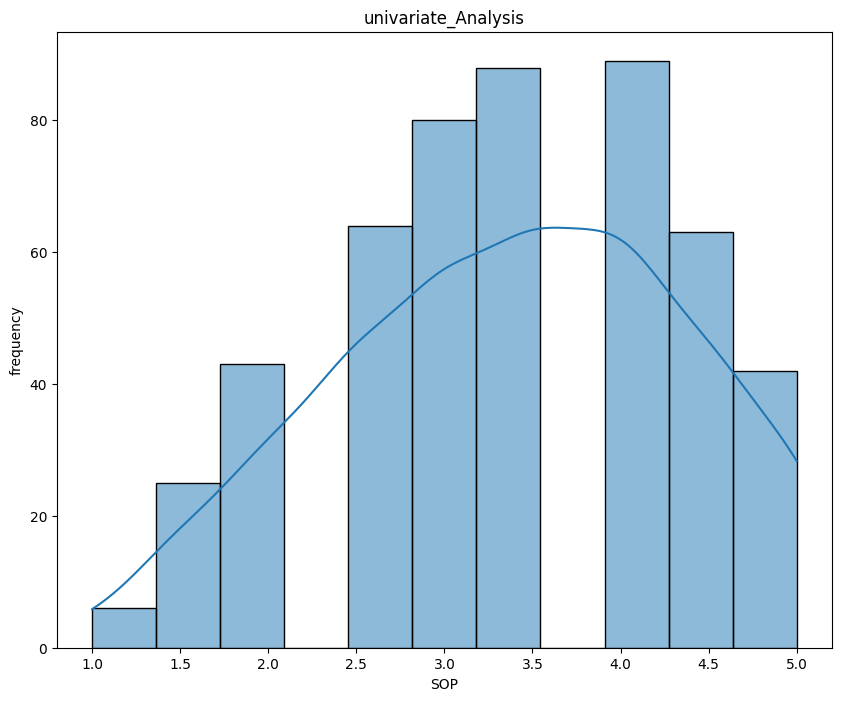

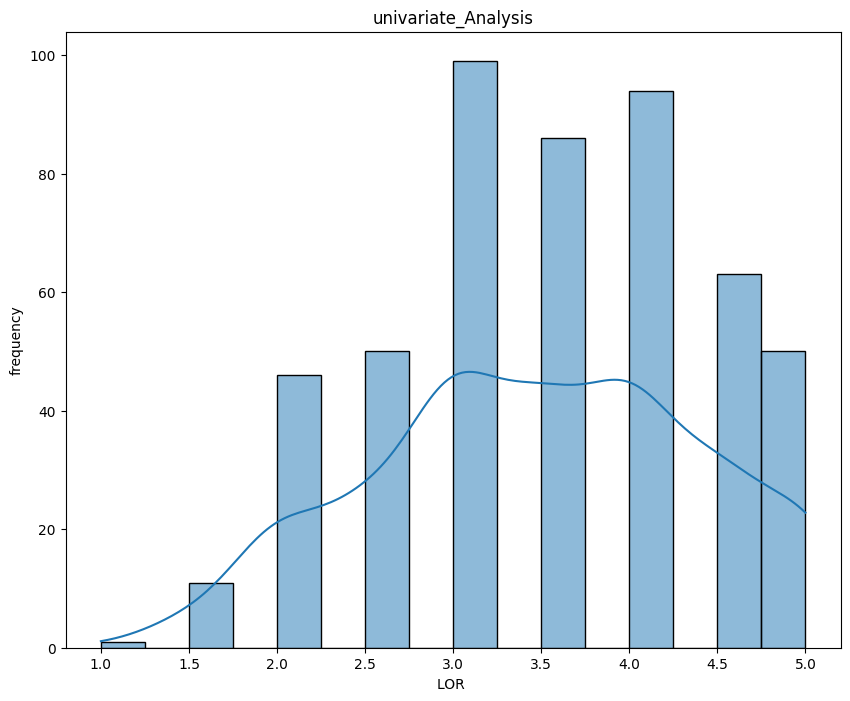

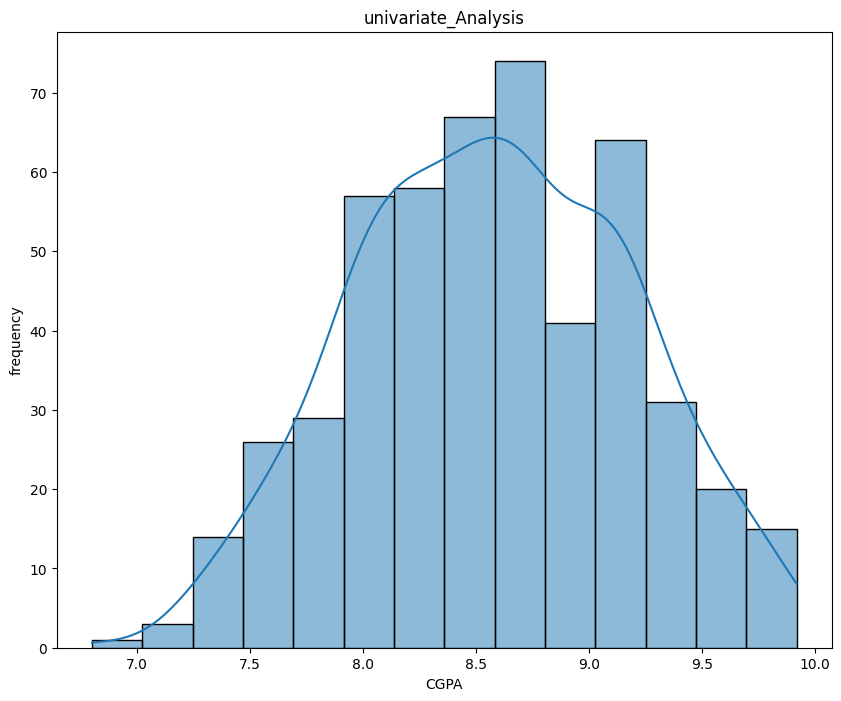

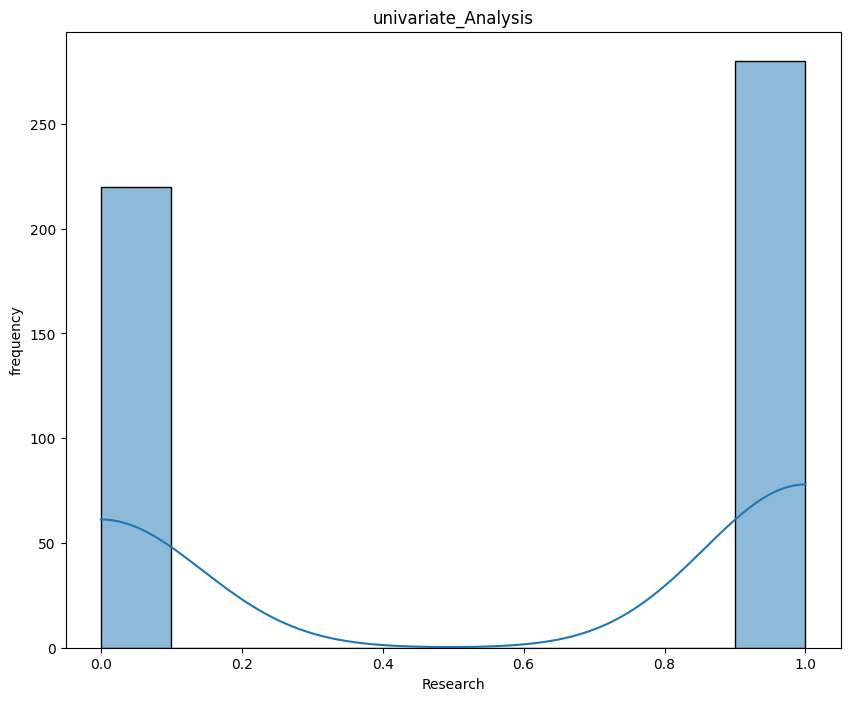

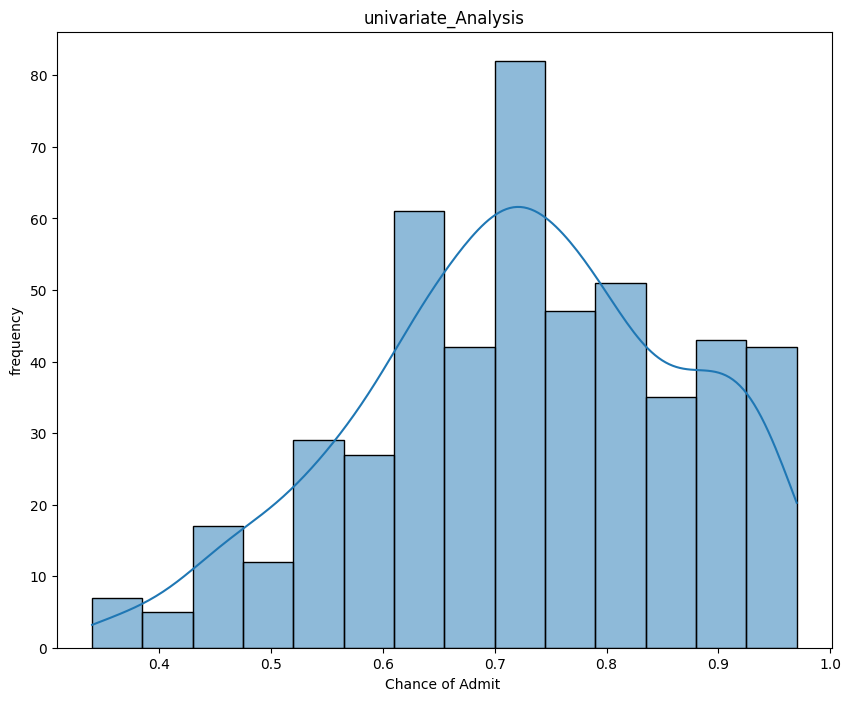

In [22]:
#### Continous Varaiables diagram Between the Varaibles ####
for column in continous_variables:
    plt.figure(figsize=(10,8))
    sns.histplot(df[column],kde=True)
    plt.title('univariate_Analysis')
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()

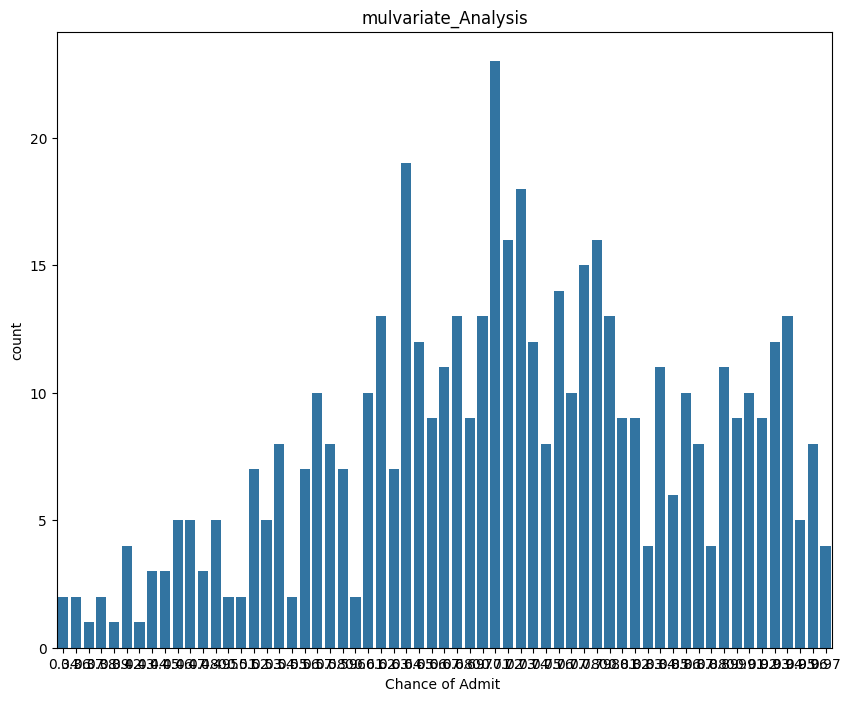

In [23]:
### Categorical Variables #####
for variable1 in categorical_variables:
    plt.figure(figsize=(10,8))
    plt.title('mulvariate_Analysis')
    sns.countplot(data=df,x=variable1)
    plt.xlabel(variable1)
    plt.ylabel('count')

In [24]:
### Categorizal Variables ###
print(categorical_variables)
df[categorical_variables]

['Chance of Admit ']


,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [25]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

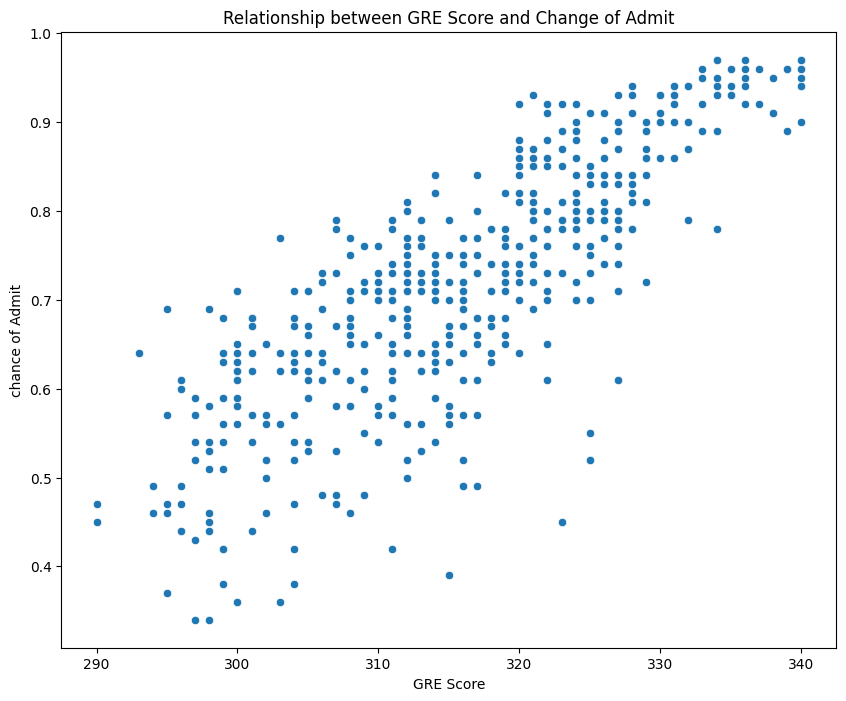

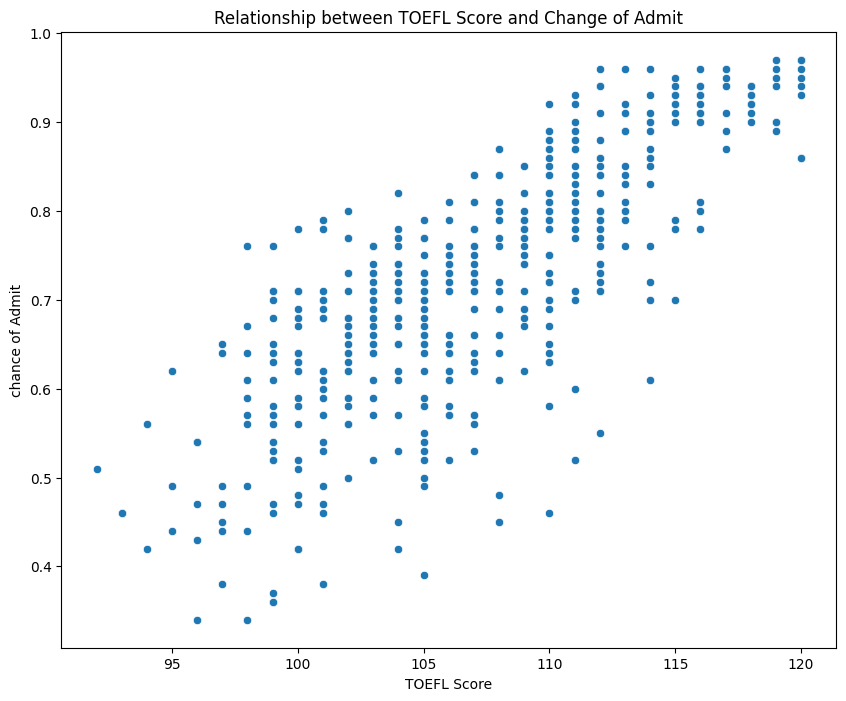

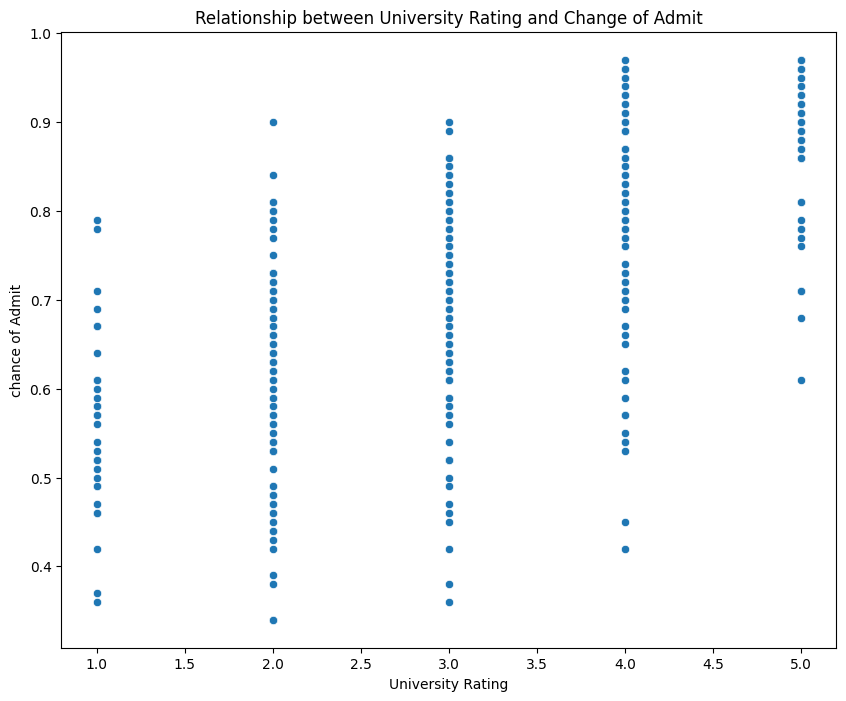

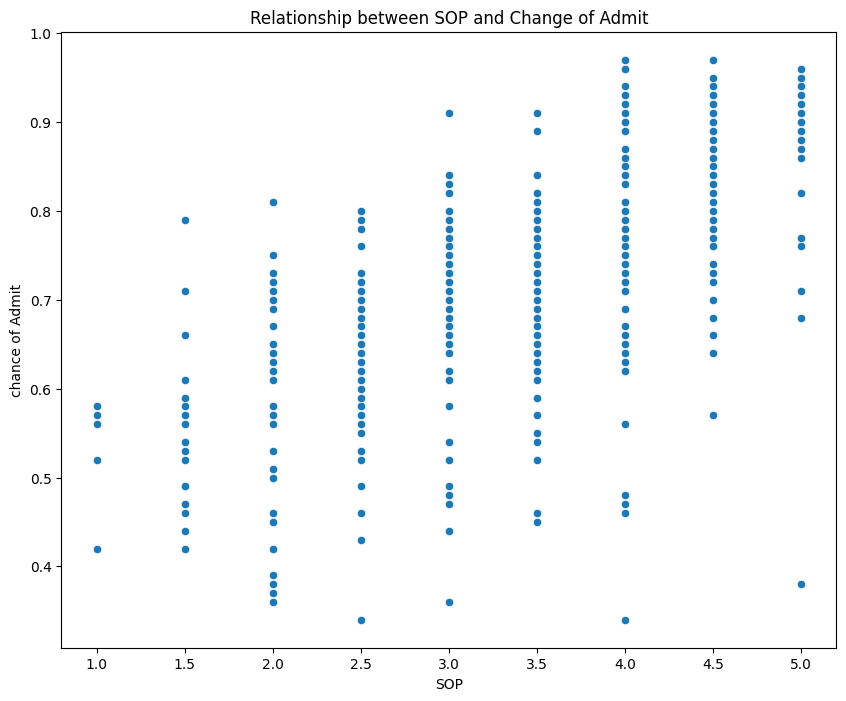

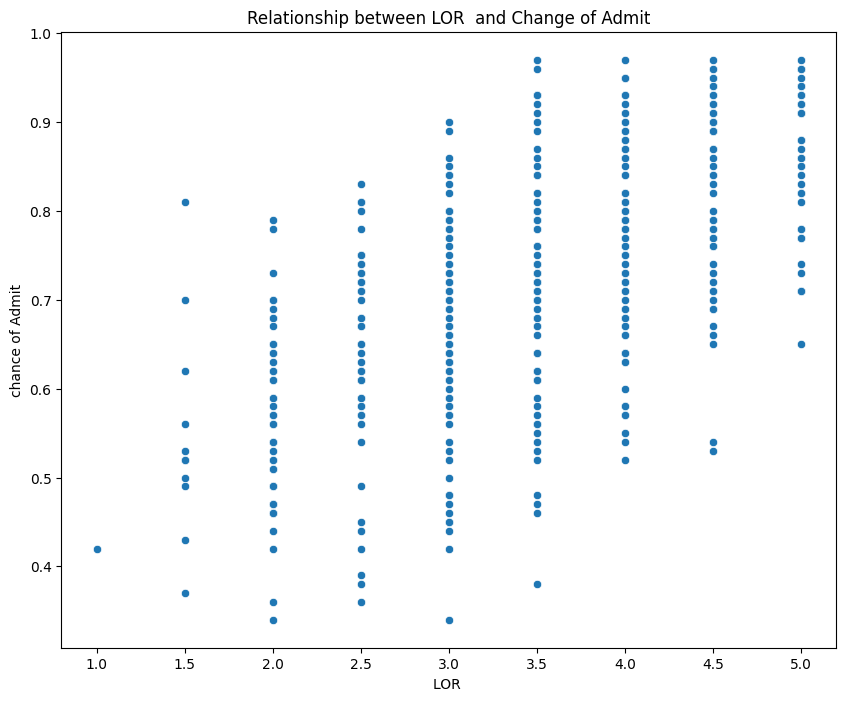

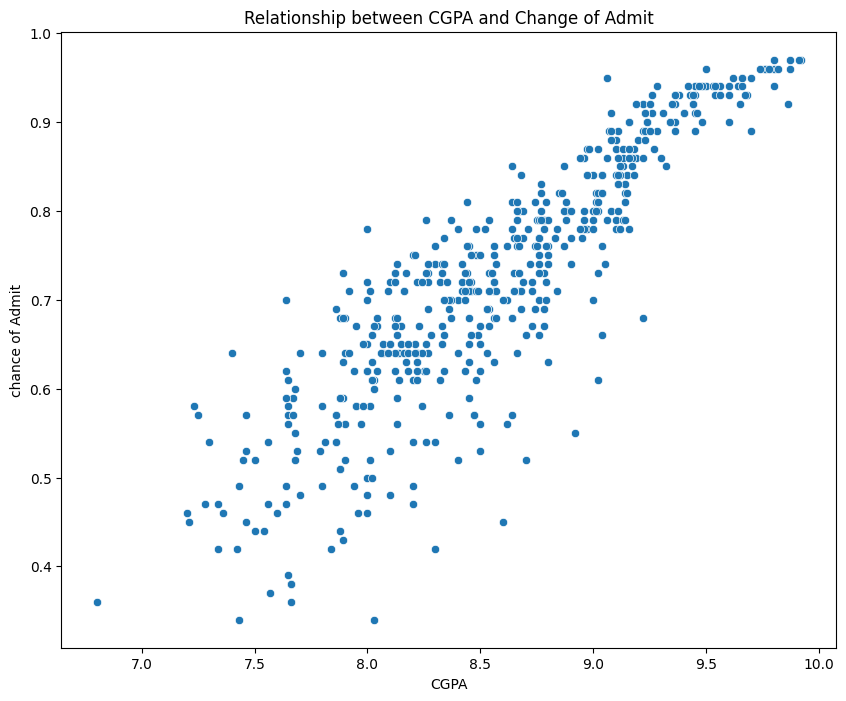

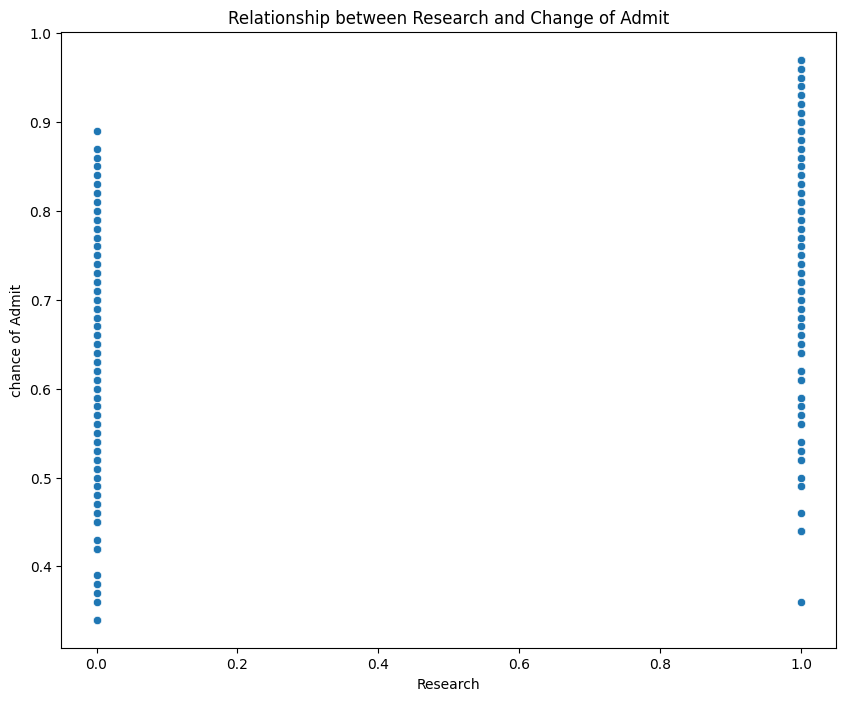

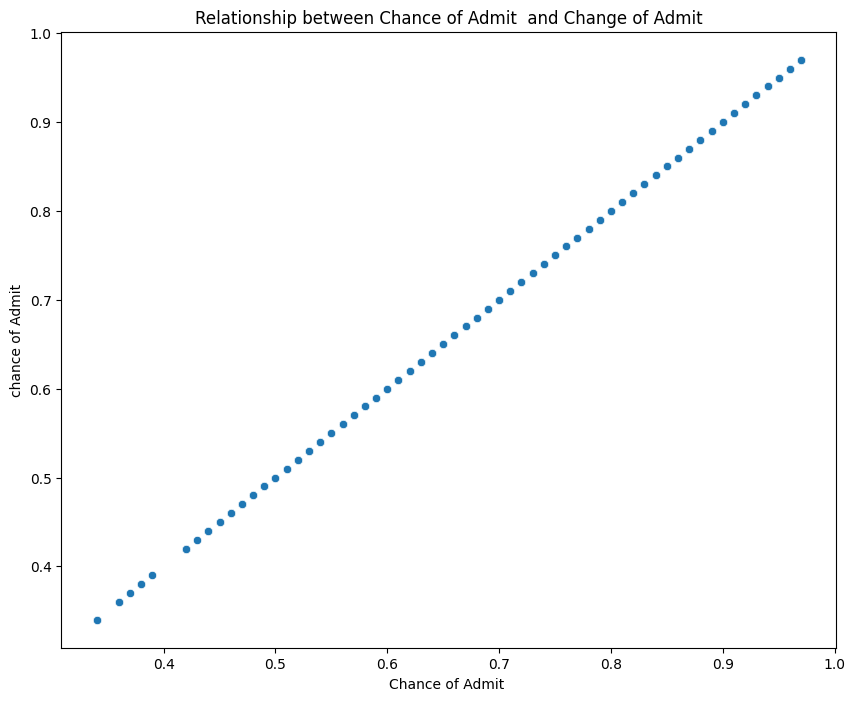

In [26]:
important_variables = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']
for variable in important_variables:
    plt.figure(figsize=(10,8))
    plt.title(f'Relationship between {variable} and Change of Admit')
    sns.scatterplot(data=df,x=variable, y='Chance of Admit ')
    plt.xlabel(variable)
    plt.ylabel('chance of Admit')
    plt.show()
    _
    

In [27]:
#### trying to verify is there any outliers are present on this tables #####
from scipy.stats import zscore
z_scores = zscore(df)
outliers = (z_scores > 3 ).sum(axis=0)
print(f'number of outliers{outliers}',outliers)

number of outliersGRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [28]:
### Tring to within 3 standard Deviation and trying to avoid more than 3 Variables####
df = df[(z_scores < 3).all(axis=1)]
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [29]:
### Creating New Features through some others features ####
df['Total'] = df['GRE Score'] + df['TOEFL Score']

In [30]:
### Is there sum value is present in the table #####
print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Total                0
dtype: int64


In [31]:
### We're tying to fill the mean vaue if any rows has missing value in the Dataframe ########
df.fillna(df.mean(),inplace=True)

In [32]:
### We're trying to convert the Standard Scaler Convertion Prrocess###########
from sklearn.preprocessing import StandardScaler
x = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']
Standard = StandardScaler()
X_Scaler = Standard.fit_transform(x)
X_Scaler


array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.77680627,
         0.88640526,  1.88054821],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  0.48585943,
         0.88640526,  0.44025088],
       [-0.0418297 , -0.52536441, -0.09979274, ..., -0.95404281,
         0.88640526, -0.21988539],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.62785086,
         0.88640526,  1.58048627],
       [-0.39631872, -0.68995225,  0.77558214, ..., -0.24236699,
        -1.12815215, -0.51994733],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  0.76721964,
        -1.12815215,  0.98036238]])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from scipy.stats import ttest_1samp 
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
##### Linear Regression Model ####
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)
LinearRegression1 = LinearRegression()
LinearRegression1.fit(x_train,y_train)
#print(LinearRegression.coef_)
#print(LinearRegression.intercept_)
y_predict = LinearRegression1.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

In [35]:
#### Output of the Linear Regression Model ##########

print('Linear Regression Model Stastistices')
print('Mean Squared Error (mse)', mse)
print('Root Mean Squared Error (rmse)', rmse)
print('R-Squarted Errorb(R2)',r2)
print(LinearRegression1.coef_)
print(LinearRegression1.coef_)
print(LinearRegression1.intercept_)


Linear Regression Model Stastistices
Mean Squared Error (mse) 0.003702827471342084
Root Mean Squared Error (rmse) 0.060850862535728155
R-Squarted Errorb(R2) 0.8189326419881622
[ 2.60179335e+09  2.60179335e+09  2.56881863e-03  1.81364641e-03
  1.72371641e-02  1.12529326e-01  2.40295939e-02 -2.60179335e+09]
[ 2.60179335e+09  2.60179335e+09  2.56881863e-03  1.81364641e-03
  1.72371641e-02  1.12529326e-01  2.40295939e-02 -2.60179335e+09]
-1.4223093750000002


In [36]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
Ridge1 = Ridge(alpha=1)
Ridge1.fit(x_train,y_train)
Ridge_y_predict = Ridge1.predict(x_test)
Ridge_R2 = r2_score(y_test, Ridge_y_predict)
Ridge_mean_square = mean_squared_error(y_test, Ridge_y_predict)
print('\nRidge Mean Square Error (mse),',Ridge_mean_square)
print('\nRidge Regression R-Squared (R2) Score:', Ridge_R2)





Ridge Mean Square Error (mse), 0.003722361761424903

Ridge Regression R-Squared (R2) Score: 0.8179774199792224


In [37]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
Lasso1 = Lasso(alpha=1.0)
Lasso1.fit(x_train,y_train)
Lasso_y_predict = Lasso1.predict(x_test)
Lasso_r2_score = r2_score(y_test, Lasso_y_predict)
Lasso_means_score = mean_squared_error(y_test, Lasso_y_predict)
print('\n Lasso Means Squared Error{mse}', Lasso_means_score)
print('\n Lasso Ridge Squared Error{Ridge}',Lasso_r2_score)


 Lasso Means Squared Error{mse} 0.009840304568281479

 Lasso Ridge Squared Error{Ridge} 0.5188115125534729


In [38]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'Total'],
      dtype='object')

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet 
from scipy.stats import shapiro 
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import VarianceThreshold


In [40]:
### Split the Data info Features and target variables ###
x= df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

In [41]:
#Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=20)

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ------------------------------- -------- 1.4/1.8 MB 30.5 MB/s eta 0:00:01
   ------------------------------- -------- 1.5/1.8 MB 15.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [44]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [45]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'Total'],
      dtype='object')

In [47]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['Chance of Admit ']

In [48]:
x = sm.add_constant(x)
print(x)
model = sm.OLS(y,x).fit()

     const  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0      1.0        337          118                  4  4.5   4.5  9.65   
1      1.0        324          107                  4  4.0   4.5  8.87   
2      1.0        316          104                  3  3.0   3.5  8.00   
3      1.0        322          110                  3  3.5   2.5  8.67   
4      1.0        314          103                  2  2.0   3.0  8.21   
..     ...        ...          ...                ...  ...   ...   ...   
495    1.0        332          108                  5  4.5   4.0  9.02   
496    1.0        337          117                  5  5.0   5.0  9.87   
497    1.0        330          120                  5  4.5   5.0  9.56   
498    1.0        312          103                  4  4.0   5.0  8.43   
499    1.0        327          113                  4  4.5   4.5  9.04   

     Research  
0           1  
1           1  
2           1  
3           1  
4           0  
..        ...  

In [49]:
def calculate_vif(x):
    vif = pd.DataFrame()
    print(x.shape[:2])
    print(x)
    print(vif)
    print(x.columns)
    vif['Features'] = x.columns
    print(vif)
    print(x.shape[1])
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)
    return vif

vif_scores = calculate_vif(x.drop(columns='const'))
print(vif_scores)
while vif_scores['VIF'].max()>5:
    max_vif_features = vif_scores.loc[vif_scores['VIF'].idxmax(),'Features']
    x = x.drop(columns=max_vif_features)
    vif_scores = calculate_vif(x.drop(columns='const'))
residuals = model.resid 
mean_residuals = np.mean(residuals)
print('Mean of Residuals: ', mean_residuals)


(500, 7)
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]
Empty DataFrame
Columns: []
Index: []
Index(['GRE Score', 'TOEFL Score', 'Unive

In [50]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Total
0,337,118,4,4.5,4.5,9.65,1,0.92,455
1,324,107,4,4.0,4.5,8.87,1,0.76,431


In [51]:
print(x,y)

     const  TOEFL Score  Research
0      1.0          118         1
1      1.0          107         1
2      1.0          104         1
3      1.0          110         1
4      1.0          103         0
..     ...          ...       ...
495    1.0          108         1
496    1.0          117         1
497    1.0          120         1
498    1.0          103         0
499    1.0          113         0

[500 rows x 3 columns] 0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64


In [52]:
y_pred = model.predict(x_test)
residuals = y_test - y_pred

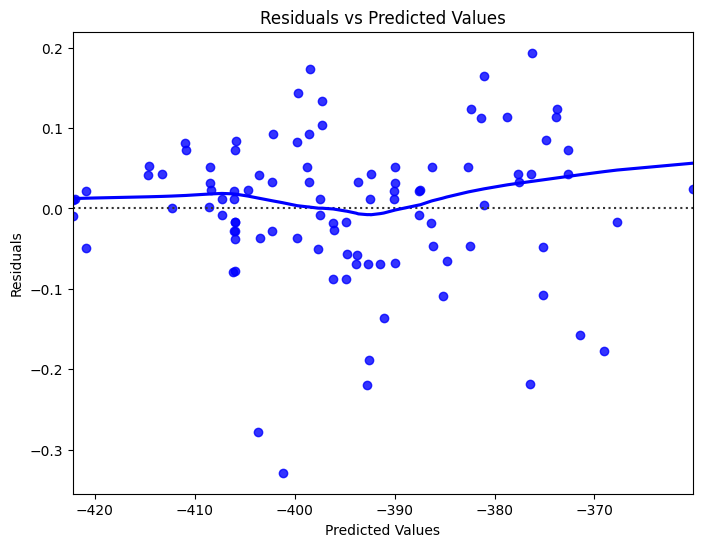

In [53]:
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

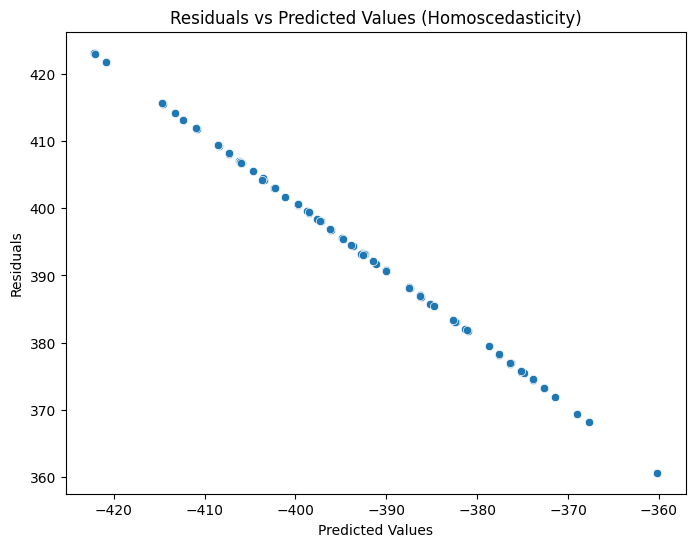

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.title("Residuals vs Predicted Values (Homoscedasticity)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Shapiro-Wilk Test:
Test Statistic: 0.9831013083457947
p-value: 0.23000174760818481


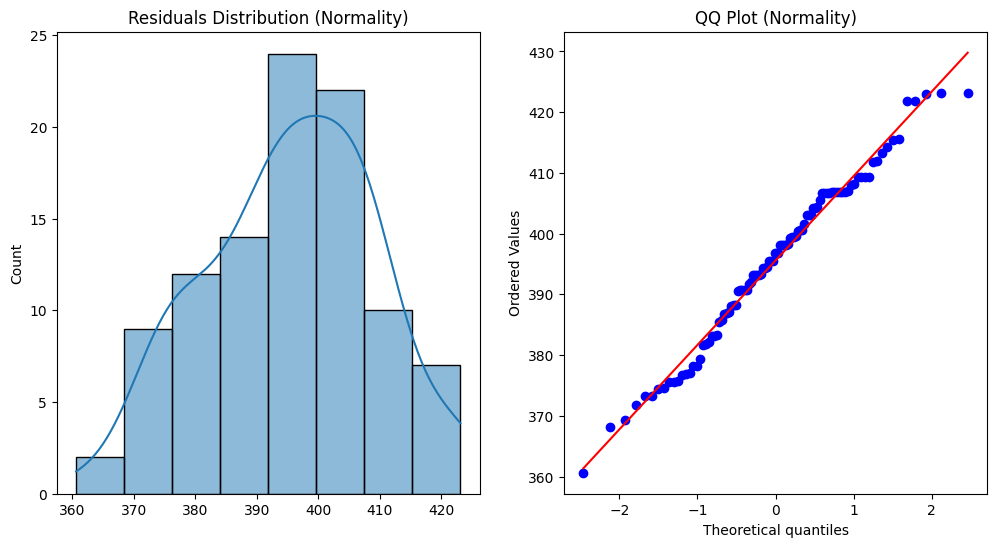

In [55]:
from scipy.stats import shapiro
from scipy import stats
shapiro_test_statistic, shapiro_p_value = shapiro(residuals)
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (Normality)")

plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot (Normality)")
plt.show()